# RBF Kernel의 Gamma 값 변화에 따른 결과 차이

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Make data

In [2]:
X = np.c_[#negative class
    (.3,-.8),
    (-1.5,-1),
    (-1.3,-.8),
    (-1.1,-1.3),
    (-1.2,-.3),
    (-1.3,-.5),
    (-.6,1.1),
    (-1.4,2.2),
    (1,1),
    
    #positive class
    (1.3,.8),
    (1.2,.5),
    (.2,-2),
    (.5,-2.4),
    (.2,-2.3),
    (0,-2.7),
    (1.3,2.1)
].T

In [3]:
X

array([[ 0.3, -0.8],
       [-1.5, -1. ],
       [-1.3, -0.8],
       [-1.1, -1.3],
       [-1.2, -0.3],
       [-1.3, -0.5],
       [-0.6,  1.1],
       [-1.4,  2.2],
       [ 1. ,  1. ],
       [ 1.3,  0.8],
       [ 1.2,  0.5],
       [ 0.2, -2. ],
       [ 0.5, -2.4],
       [ 0.2, -2.3],
       [ 0. , -2.7],
       [ 1.3,  2.1]])

In [4]:
Y = [-1]*8 + [1]*8
gamma_option = [1,2,4]

## Viz Data

C:\Users\KIST\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


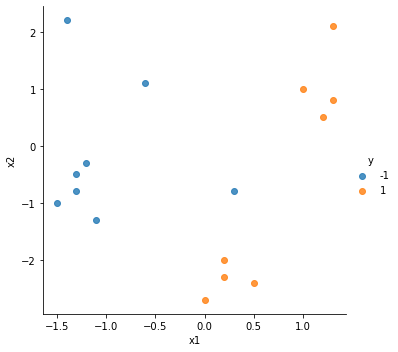

In [9]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'y':Y})
sns.lmplot('x1', 'x2', data=df, hue='y', fit_reg=False)

plt.show()

# Viz RBF kernel based on $\gamma$

In [12]:
X,Y = np.array(X),np.array(Y)

C:\Users\KIST\AppData\Local\Temp/ipykernel_2508/935163815.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX,YY,Z>0,cmap = plt.cm.Paired)#클래스 별 색칠
C:\Users\KIST\AppData\Local\Temp/ipykernel_2508/935163815.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX,YY,Z>0,cmap = plt.cm.Paired)#클래스 별 색칠
C:\Users\KIST\AppData\Local\Temp/ipykernel_2508/935163815.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have 

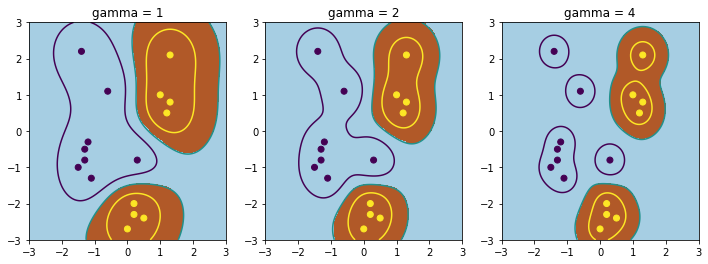

In [14]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.figure(1,figsize = (4*len(gamma_option),4))

for i,gamma in enumerate(gamma_option,1):
    svm = SVC(kernel = 'rbf', gamma=gamma)
    svm.fit(X,Y)
    plt.subplot(1,len(gamma_option),i)
    plt.scatter(X[:,0],X[:,1], c= Y, zorder = 10)
    XX,YY = np.mgrid[-3:3:200j,-3:3:200j]#좌표범위
    
    Z = svm.decision_function(np.c_[XX.ravel(),YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.pcolormesh(XX,YY,Z>0,cmap = plt.cm.Paired)#클래스 별 색칠
    plt.contour(XX,YY,Z,levels = [-.5,0,.5])#levels는 경계선 범위 결정
    plt.title('gamma = %d'%gamma)
plt.show()

- gamma가 크면: overfitting의 위험
- gamma가 작으면: 정확도 감소의 위험